# ChatGPT Payments Assistant

In [1]:
import openai
import os
import iplantuml
from IPython.display import display, Markdown, Latex, HTML, Image, SVG, Javascript, IFrame, Audio, Video, JSON, Pretty
import random as rd

# Get API key
with open('secret', 'r') as file:
    secret = file.read()

openai.api_key = secret


Write me a python script to make a monthly recurring payment using a banking API.

In [2]:

content = input()
while True:
    chatgptR = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
            {"role": "system", "content": "You are a software engineer lead who works in payments teaching junior engineers how to code."},
        {"role": "user", "content": content + " Assume that the banking API can only perform simple transactions such as send payment and show balance, but doesn't have a schedule recurring payment function so you will have to use Python to schedule it. Also create the corresponding plantUML code snippet to show the payment flow for the Python script you give me. Don't forget that plantUML names with spaces in them require double quotes to be escaped."}
        ]
    )
    plantUMLString = ""
    flag = 0
    worked = 0
    for part in chatgptR.choices[0]['message']['content'].split('\n'):
        print(part)
        if part == "@startuml":
            flag = 1
        if part == "```" and flag:
            flag = 0
            try:
                get_ipython().run_cell_magic('plantuml', '', plantUMLString)
                worked = 1
                break
            except Exception as e:
                worked = 0
                pass

        if flag:
            plantUMLString += part + "\n"
    
    if worked:
        break

Here's a Python script that schedules a monthly payment using a hypothetical banking API:

```python
import time
import banking_api

def make_payment(amount):
    # Make payment using banking API
    banking_api.send_payment(amount)
    print("Payment of {} made successfully".format(amount))

# Define payment details
payment_amount = 100
payment_frequency = 30 # days

# Set start time for payment scheduling
start_time = time.time()

# Schedule payments
while True:
    # Get current time
    current_time = time.time()

    # Calculate time the next payment should be made
    next_payment_time = start_time + payment_frequency * 86400

    # Check if it's time to make a payment
    if current_time >= next_payment_time:
        # Make payment
        make_payment(payment_amount)

        # Update start time for next payment schedule
        start_time = current_time
```

And here's the corresponding PlantUML code snippet that shows the payment flow:

```
@startuml

title Payment Flow

acto

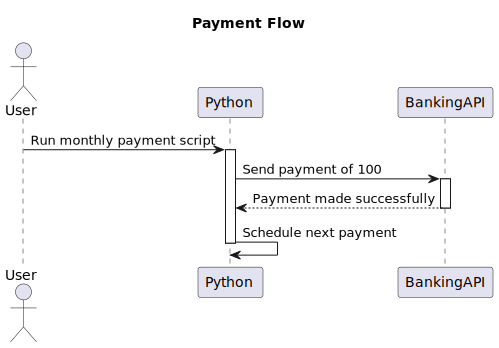

In [3]:
get_ipython().run_cell_magic('plantuml', '', plantUMLString)